<a href="https://colab.research.google.com/github/Akshat4112/Nike_sentiment_analysis/blob/master/Neurosensum_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [70]:
!pip install textblob
!pip install wordcloud
!pip install gensim

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.classify import SklearnClassifier
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
nltk.download('wordnet')

# Other
import re
import string
import numpy as np
np.random.seed(2018)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from textblob import TextBlob
from collections import Counter
from time import time
from subprocess import check_output

# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from sklearn.manifold import TSNE

#from wordcloud for worldcloud
from wordcloud import WordCloud,STOPWORDS


#import gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



# **Read nike csv data**

In [71]:
!pip install xlrd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
  
nike_csv = pd.read_excel(fn)
nike_csv.head()

Saving data12.xlsx to data12 (2).xlsx
User uploaded file "data12.xlsx" with length 61003 bytes


,Review
0,PRICED ABOVE MSRP. First thing first. These ar...
1,"Fantastic product, the high quality stuff you ..."
2,"Nice, comfortable shirt. I wear it playing ten..."
3,Im such a big fan of this running and workout ...
4,The Nike Mens Legend shirt fit great for my so...


# **Make new coloumn for score of the sentiment**

In [0]:
nike_csv['score'] = ''

# **New structure of dataframe**

In [73]:
print(nike_csv.head())

                                              Review score
0  PRICED ABOVE MSRP. First thing first. These ar...      
1  Fantastic product, the high quality stuff you ...      
2  Nice, comfortable shirt. I wear it playing ten...      
3  Im such a big fan of this running and workout ...      
4  The Nike Mens Legend shirt fit great for my so...      


# **Looking into first review**

In [74]:
print(nike_csv['Review'][0])

PRICED ABOVE MSRP. First thing first. These are Overpriced. This particular Nike Dri-Fit Training shirt has an MSRP of $22 (see picture of the tag from the green shirt for $22 and I paid $24 for it) and most of them listed here are going for $22-$30. That is ridiculous. You can go to Dicks Sporting Goods website and get them for $16.50. I ordered two of these shirts in red and green size XL for $23 and $24 respectively. The only reason I ordered these is because I thought they were the Dri-Fit Ts that normally retail for ~$35 and I thought I was getting a good deal. I have two of the $35 dri-fit t-shirts already, which fit really nice (not tight, I hate tight shirts, but not loose). These cheaper dri-fit t-shirts fit much larger than the $35 ones (see picture red $22 MSRP from amazon on left and navy $35 MSRP from Dicks on right, both XL). I am 63", 230 lbs and the XL feels like I am wearing a dress.

I will be returning these shirts. I paid too much for what they actually are, and on 

# **Scoring reviews for training of ML Model**

In [0]:
for i in range(len(nike_csv['Review'])):
    testimonial = TextBlob(nike_csv['Review'][i])
    testimonial.sentiment
    nike_csv['score'][i]=testimonial.sentiment.polarity

# **a look at modified dataframe with scores**

In [76]:
nike_csv.head()

,Review,score
0,PRICED ABOVE MSRP. First thing first. These ar...,0.131667
1,"Fantastic product, the high quality stuff you ...",0.208524
2,"Nice, comfortable shirt. I wear it playing ten...",0.0197619
3,Im such a big fan of this running and workout ...,-0.05
4,The Nike Mens Legend shirt fit great for my so...,0.45


# **Converting scores to 0 and 1 for positive and negative sentiments**

In [0]:
for i in range(len(nike_csv['score'])):
    if nike_csv['score'][i]>  0:
        nike_csv['score'][i] = 1
    else:
        nike_csv['score'][i] = 0

# **a look at scored modified dataframe**



In [78]:
nike_csv.head(10)

,Review,score
0,PRICED ABOVE MSRP. First thing first. These ar...,1
1,"Fantastic product, the high quality stuff you ...",1
2,"Nice, comfortable shirt. I wear it playing ten...",1
3,Im such a big fan of this running and workout ...,0
4,The Nike Mens Legend shirt fit great for my so...,1
5,Nice fit and wears as advertised. Dri material...,1
6,Awesome and comfortable shirt! I wear when wor...,1
7,This particular shirt came quite a bit larger ...,1
8,Not yellow\nIt is a puke color and it was wadd...,1
9,"Definitely great and authentic Nike quality, b...",1


# **Function for cleaning the review**

In [79]:
nltk.download('stopwords')
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **reviews cleaned and modified text written in dataframe**

In [0]:
nike_csv['Review'] = nike_csv['Review'].map(lambda x: clean_text(x))

# **a look at modified dataframe**

In [81]:
nike_csv.head()

,Review,score
0,price msrp first thing first overpr particular...,1
1,fantast product high qualiti stuff expect nike...,1
2,nice comfort shirt wear play tenni jog boat ru...,1
3,big fan run workout shirt wick moistur well ac...,0
4,nike men legend shirt fit great son use summer...,1


# **Barplot of occurances of each positive and negative review, a look at data.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



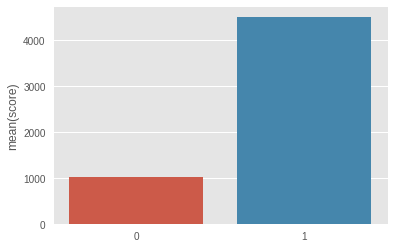

In [82]:
sns.barplot(x=['1', '0'], y=nike_csv['score'].value_counts())
plt.show()

# **Wordcount plot of positive reviews**

Positive words


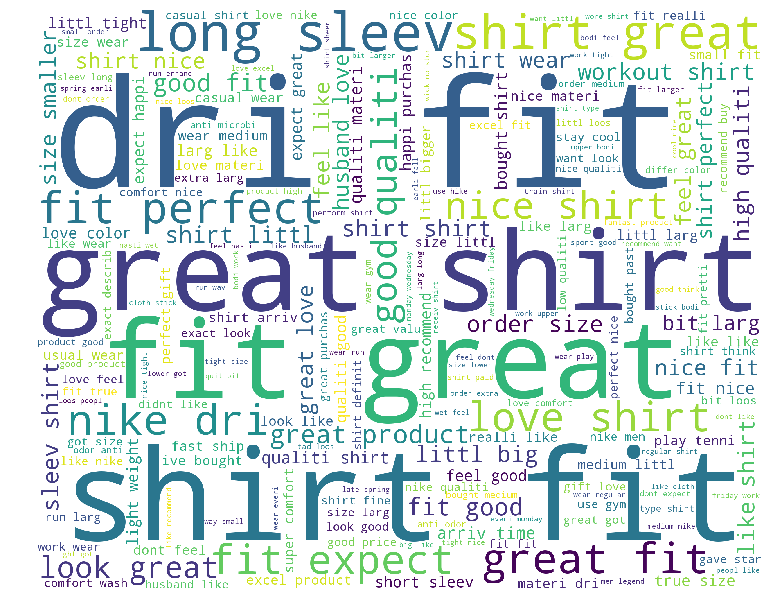

In [83]:

train_pos = nike_csv[ nike_csv['score'] == 1]
train_pos = nike_csv['Review']
train_neg = nike_csv[ nike_csv['score'] == 0]
train_neg = nike_csv['Review']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
# print("Negative words")
# wordcloud_draw(train_neg)

# **Training of the model for Sentimental Analysis**

In [0]:
train, test = train_test_split(nike_csv,test_size = 0.1)

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Review.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.score))

test_pos = test[ test['score'] == 1]
test_pos = test_pos['Review']
test_neg = test[ test['score'] == 0]
test_neg = test_neg['Review']

In [0]:
#  Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

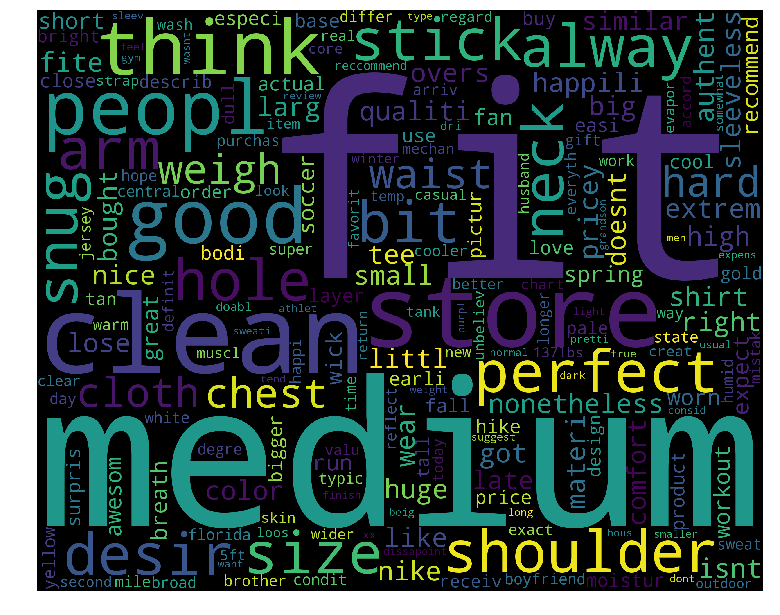

In [86]:
wordcloud_draw(w_features)

## **Training the Naive Bayes classifier**

In [0]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [88]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt)) 

[Negative]: 92/78 
[Positive]: 460/458 


# **Neural Network Model using TF**

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import seaborn as sns

In [90]:
!pip install xlrd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
  
nike_csv = pd.read_excel(fn)
nike_csv.head()
nike_csv['polarity'] = ''

print(nike_csv.head())
for i in range(len(nike_csv['Review'])):
    testimonial = TextBlob(nike_csv['Review'][i])
    testimonial.sentiment
    nike_csv['polarity'][i]=testimonial.sentiment.polarity
for i in range(len(nike_csv['polarity'])):
    if nike_csv['polarity'][i]>  0:
        nike_csv['polarity'][i] = 1
    else:
        nike_csv['polarity'][i] = 0


        
  
train_df = nike_csv
test_df = nike_csv

Saving data12.xlsx to data12 (3).xlsx
User uploaded file "data12.xlsx" with length 61003 bytes
                                              Review polarity
0  PRICED ABOVE MSRP. First thing first. These ar...         
1  Fantastic product, the high quality stuff you ...         
2  Nice, comfortable shirt. I wear it playing ten...         
3  Im such a big fan of this running and workout ...         
4  The Nike Mens Legend shirt fit great for my so...         


In [91]:
train_df.head()

,Review,polarity
0,PRICED ABOVE MSRP. First thing first. These ar...,1
1,"Fantastic product, the high quality stuff you ...",1
2,"Nice, comfortable shirt. I wear it playing ten...",1
3,Im such a big fan of this running and workout ...,0
4,The Nike Mens Legend shirt fit great for my so...,1


In [0]:
sentences = nike_csv['Review'].values
y = nike_csv['polarity'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train
X_test

<1379x1321 sparse matrix of type '<class 'numpy.int64'>'
	with 19573 stored elements in Compressed Sparse Row format>

In [94]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

In [0]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [96]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                13220     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 13,231
Trainable params: 13,231
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=10)

In [0]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [0]:
# plot_history(history)

# **Attribute Analysis from dataset**

In [0]:
data_text = nike_csv[['Review']]
documents = data_text

In [0]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [0]:
processed_docs = documents['Review'].map(preprocess)

In [106]:
processed_docs[:10]

0    [price, msrp, thing, overpric, particular, nik...
1    [fantast, product, high, qualiti, stuff, expec...
2    [nice, comfort, shirt, wear, play, tenni, jog,...
3    [run, workout, shirt, wick, moistur, actual, h...
4    [nike, men, legend, shirt, great, summer, camp...
5    [nice, wear, advertis, materi, retain, slight,...
6    [awesom, comfort, shirt, wear, work, play, ten...
7    [particular, shirt, come, larger, medium, nike...
8    [yellow, puke, color, wad, packag, think, orig...
9    [definit, great, authent, nike, qualiti, larg,...
Name: Review, dtype: object

In [107]:
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 actual
1 amazon
2 cheaper
3 deal
4 dick
5 dont
6 dress
7 favor
8 feel
9 get
10 go


# **Bag of words on the dataset**

In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [109]:

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(47, 1), (80, 1)]

In [110]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 47 ("fit") appears 1 time.
Word 80 ("great") appears 1 time.


# **TF-IDF**

In [0]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [112]:
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.12164587200998246),
 (1, 0.13735945222072815),
 (2, 0.1311119961976021),
 (3, 0.13735945222072815),
 (4, 0.09636233200784815),
 (5, 0.1565332123169777),
 (6, 0.08335411284068159),
 (7, 0.1178770003886995),
 (8, 0.1311119961976021),
 (9, 0.11321656576468674),
 (10, 0.3130664246339554),
 (11, 0.14536704561249356),
 (12, 0.0700352239085471),
 (13, 0.24329174401996492),
 (14, 0.1565332123169777),
 (15, 0.06256321121154917),
 (16, 0.08131930394315652),
 (17, 0.0865993273691037),
 (18, 0.0636004377778647),
 (19, 0.06811642476387139),
 (20, 0.12164587200998246),
 (21, 0.3176793694641041),
 (22, 0.1565332123169777),
 (23, 0.14536704561249356),
 (24, 0.2622239923952042),
 (25, 0.229095785474091),
 (26, 0.09189388949599644),
 (27, 0.1311119961976021),
 (28, 0.07138998261379136),
 (29, 0.13735945222072815),
 (30, 0.1565332123169777),
 (31, 0.1178770003886995),
 (32, 0.11156656305348318),
 (33, 0.2550515136150945),
 (34, 0.1293534940487644),
 (35, 0.12164587200998246),
 (36, 0.1453670456124

# **Running LDA using Bag of Words**

In [113]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.113*"good" + 0.089*"great" + 0.039*"fit" + 0.039*"materi" + 0.037*"shirt" + 0.033*"color" + 0.032*"qualiti" + 0.031*"happi" + 0.027*"purchas" + 0.022*"look"
Topic: 1 
Words: 0.120*"shirt" + 0.039*"wear" + 0.034*"buy" + 0.032*"comfort" + 0.026*"great" + 0.022*"long" + 0.021*"good" + 0.021*"qualiti" + 0.018*"sleev" + 0.016*"nike"
Topic: 2 
Words: 0.085*"nice" + 0.041*"small" + 0.040*"wear" + 0.039*"look" + 0.034*"excel" + 0.034*"materi" + 0.032*"feel" + 0.029*"great" + 0.025*"right" + 0.025*"product"
Topic: 3 
Words: 0.123*"shirt" + 0.052*"order" + 0.041*"size" + 0.028*"great" + 0.026*"larg" + 0.020*"nice" + 0.019*"good" + 0.018*"tight" + 0.018*"like" + 0.017*"fit"
Topic: 4 
Words: 0.050*"great" + 0.047*"like" + 0.045*"shirt" + 0.038*"fit" + 0.029*"feel" + 0.026*"nike" + 0.025*"look" + 0.021*"good" + 0.021*"littl" + 0.019*"perfect"
Topic: 5 
Words: 0.108*"shirt" + 0.101*"love" + 0.058*"great" + 0.031*"fit" + 0.031*"larg" + 0.027*"wear" + 0.026*"buy" + 0.024*"like" + 0.

# **Running LDA using TF-IDF**

In [114]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


Topic: 0 Word: 0.048*"great" + 0.041*"look" + 0.038*"shirt" + 0.034*"larg" + 0.027*"qualiti" + 0.025*"littl" + 0.022*"nice" + 0.021*"super" + 0.019*"perfect" + 0.016*"color"
Topic: 1 Word: 0.050*"great" + 0.043*"comfort" + 0.031*"shirt" + 0.029*"fit" + 0.029*"exact" + 0.026*"love" + 0.025*"arriv" + 0.024*"price" + 0.020*"describ" + 0.014*"look"
Topic: 2 Word: 0.091*"love" + 0.046*"expect" + 0.042*"fit" + 0.031*"great" + 0.029*"shirt" + 0.029*"buy" + 0.020*"comfort" + 0.020*"light" + 0.018*"good" + 0.017*"true"
Topic: 3 Word: 0.087*"nice" + 0.037*"perfect" + 0.033*"love" + 0.028*"shirt" + 0.026*"color" + 0.026*"thank" + 0.023*"christma" + 0.021*"great" + 0.020*"awesom" + 0.017*"excel"
Topic: 4 Word: 0.030*"materi" + 0.026*"great" + 0.024*"fit" + 0.023*"expect" + 0.023*"product" + 0.022*"shirt" + 0.021*"comfort" + 0.020*"comfi" + 0.018*"size" + 0.017*"qualiti"
Topic: 5 Word: 0.067*"perfect" + 0.063*"shirt" + 0.029*"long" + 0.028*"right" + 0.026*"good" + 0.022*"sleev" + 0.020*"color" + 0.

# **Classification of the topics**

# **Performance evaluation by classifying sample document using LDA Bag of Words model**

In [115]:
processed_docs[4310]

['fit', 'great']

In [116]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6999408006668091	 
Topic: 0.113*"good" + 0.089*"great" + 0.039*"fit" + 0.039*"materi" + 0.037*"shirt" + 0.033*"color" + 0.032*"qualiti" + 0.031*"happi" + 0.027*"purchas" + 0.022*"look"

Score: 0.033347174525260925	 
Topic: 0.104*"shirt" + 0.071*"expect" + 0.058*"fit" + 0.050*"great" + 0.030*"perfect" + 0.025*"run" + 0.025*"cool" + 0.024*"love" + 0.020*"good" + 0.019*"arm"

Score: 0.033342719078063965	 
Topic: 0.050*"great" + 0.047*"like" + 0.045*"shirt" + 0.038*"fit" + 0.029*"feel" + 0.026*"nike" + 0.025*"look" + 0.021*"good" + 0.021*"littl" + 0.019*"perfect"

Score: 0.0333421491086483	 
Topic: 0.108*"shirt" + 0.101*"love" + 0.058*"great" + 0.031*"fit" + 0.031*"larg" + 0.027*"wear" + 0.026*"buy" + 0.024*"like" + 0.019*"nike" + 0.018*"loos"

Score: 0.033339377492666245	 
Topic: 0.059*"qualiti" + 0.053*"great" + 0.045*"shirt" + 0.038*"exact" + 0.034*"want" + 0.031*"nike" + 0.030*"think" + 0.027*"fast" + 0.027*"order" + 0.025*"describ"

Score: 0.033339112997055054	 
Topic: 0.076

# **Performance evaluation by classifying sample document using LDA Bag of Words model**

In [117]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.699951708316803	 
Topic: 0.166*"great" + 0.043*"shirt" + 0.032*"fit" + 0.027*"sleev" + 0.024*"long" + 0.022*"size" + 0.021*"good" + 0.019*"qualiti" + 0.018*"larg" + 0.016*"nike"

Score: 0.03334503248333931	 
Topic: 0.050*"great" + 0.043*"comfort" + 0.031*"shirt" + 0.029*"fit" + 0.029*"exact" + 0.026*"love" + 0.025*"arriv" + 0.024*"price" + 0.020*"describ" + 0.014*"look"

Score: 0.033342767506837845	 
Topic: 0.091*"love" + 0.046*"expect" + 0.042*"fit" + 0.031*"great" + 0.029*"shirt" + 0.029*"buy" + 0.020*"comfort" + 0.020*"light" + 0.018*"good" + 0.017*"true"

Score: 0.03333926200866699	 
Topic: 0.123*"good" + 0.035*"excel" + 0.029*"like" + 0.028*"fit" + 0.027*"order" + 0.026*"feel" + 0.025*"wear" + 0.022*"size" + 0.022*"qualiti" + 0.020*"larg"

Score: 0.03333887457847595	 
Topic: 0.030*"materi" + 0.026*"great" + 0.024*"fit" + 0.023*"expect" + 0.023*"product" + 0.022*"shirt" + 0.021*"comfort" + 0.020*"comfi" + 0.018*"size" + 0.017*"qualiti"

Score: 0.03333762660622597	 
Topic:

# **Testing model on unseen document**

In [118]:
unseen_document = 'This is very good piece of cloth'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6999161839485168	 Topic: 0.113*"good" + 0.089*"great" + 0.039*"fit" + 0.039*"materi" + 0.037*"shirt"
Score: 0.03335797041654587	 Topic: 0.120*"shirt" + 0.039*"wear" + 0.034*"buy" + 0.032*"comfort" + 0.026*"great"
Score: 0.03335481509566307	 Topic: 0.059*"qualiti" + 0.053*"great" + 0.045*"shirt" + 0.038*"exact" + 0.034*"want"
Score: 0.033348988741636276	 Topic: 0.050*"great" + 0.047*"like" + 0.045*"shirt" + 0.038*"fit" + 0.029*"feel"
Score: 0.033343568444252014	 Topic: 0.077*"size" + 0.040*"like" + 0.039*"shirt" + 0.038*"long" + 0.036*"larg"
Score: 0.03334017097949982	 Topic: 0.108*"shirt" + 0.101*"love" + 0.058*"great" + 0.031*"fit" + 0.031*"larg"
Score: 0.033336229622364044	 Topic: 0.123*"shirt" + 0.052*"order" + 0.041*"size" + 0.028*"great" + 0.026*"larg"
Score: 0.0333343930542469	 Topic: 0.104*"shirt" + 0.071*"expect" + 0.058*"fit" + 0.050*"great" + 0.030*"perfect"
Score: 0.033334314823150635	 Topic: 0.076*"perfect" + 0.069*"comfort" + 0.064*"shirt" + 0.052*"product" + 0.02

In [119]:
import spacy
!python -m spacy download en

!python -m spacy download en_core_web_md
!python -m spacy link en_core_web_md en 
from spacy.lang.en import English
import en_core_web_sm
nlp = en_core_web_sm.load()

parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')


    Link 'en' already exists
    To overwrite an existing link, use the --force flag.



# **Lemmatization**

In [120]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Stopwords for frequent occuring words**

In [121]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Text pre-processing for LDA**

In [0]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

# **Import CSV from Google colab**

In [123]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
import random
text_data = []
with open('dataset.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

Saving dataset.csv to dataset (1).csv
User uploaded file "dataset.csv" with length 538449 bytes
['comfortable', 'shirt', 'playing', 'tennis', 'jogging', 'boating', 'running', 'errand', 'large', 'several', 'colors', 'range', 'price', 'white', 'cheap']
['material', 'shirt', 'weigh', 'sweat']
['beautifully']
['great', 'look', 'great', 'material', 'quality']
['comfortable', 'white', 'workout', 'shirt', 'stain', 'sunscreen']
['everything', 'arrive', 'condition', 'great', 'product', 'working', 'exactly', 'hope', 'expect', 'happy', 'purchase']
['awesome', 'comfortable', 'shirt', 'working', 'playing', 'tennis', 'around', 'house', 'price']
[]
['mistake', 'choose', 'cover']
['design']
['shirt', 'great', 'tennis', 'great']
['shirt', 'hella', 'chick']
[]
['great', 'shirt', 'comfortable', 'fitting']
['quality', 'product']
[]
['great']
['fantastic', 'product', 'quality', 'stuff', 'expect']
['super', 'comfortable', 'shirt']
['wonderful', 'shirt', 'look', 'great', 'feel', 'better', 'daughter', 'typica

In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

In [0]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [0]:

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [0]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [128]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.081*"great" + 0.047*"product" + 0.036*"quality" + 0.025*"expect"')
(1, '0.071*"order" + 0.037*"shirt" + 0.020*"look" + 0.020*"material"')
(2, '0.067*"shirt" + 0.057*"great" + 0.030*"large" + 0.030*"material"')
(3, '0.055*"husband" + 0.042*"love" + 0.042*"color" + 0.029*"better"')
(4, '0.114*"shirt" + 0.019*"might" + 0.019*"shape" + 0.019*"fabric"')


In [129]:
new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))


[]
[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]


In [130]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.086*"shirt" + 0.037*"material" + 0.032*"order" + 0.026*"shape"')
(1, '0.051*"shirt" + 0.031*"large" + 0.024*"expect" + 0.023*"little"')
(2, '0.071*"shirt" + 0.063*"great" + 0.023*"love" + 0.018*"comfortable"')


In [131]:

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.137*"shirt" + 0.050*"shape" + 0.050*"might" + 0.050*"fabric"')
(1, '0.084*"better" + 0.057*"dollar" + 0.056*"love" + 0.056*"daughter"')
(2, '0.084*"love" + 0.044*"husband" + 0.044*"several" + 0.044*"times"')
(3, '0.087*"product" + 0.085*"expect" + 0.066*"purchase" + 0.065*"quality"')
(4, '0.140*"great" + 0.107*"shirt" + 0.065*"comfortable" + 0.044*"tennis"')
(5, '0.095*"order" + 0.072*"colors" + 0.049*"great" + 0.049*"different"')
(6, '0.045*"large" + 0.041*"order" + 0.040*"comfortable" + 0.040*"white"')
(7, '0.088*"shirt" + 0.048*"large" + 0.040*"great" + 0.030*"husband"')
(8, '0.088*"shirt" + 0.026*"thought" + 0.026*"green" + 0.026*"first"')
(9, '0.081*"small" + 0.029*"shirt" + 0.029*"loose" + 0.029*"feel"')


In [0]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

# **Importing pyLDAvis for LDA Visualisation**

In [133]:
!pip install pyLDAvis
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

# **pyLDAvis for model3**

In [134]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

# **pyLDAvis  for model10 **

In [135]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)